In [1]:
#!/usr/bin/env python
import pandas
import sqlite3

connection = sqlite3.connect("../data/gwas_g2p/metaxcan_results_p/metaxcan_results_v1.5.db")

In [2]:
pi = pandas.read_sql_query("SELECT p.tag, pi.portal FROM pheno as p INNER JOIN pheno_info as pi on p.id = pi.pheno_id", connection)

In [3]:
for t in pi.tag:
    print t

ADIPOGen_Adiponectin
ANGST_ANXIETY_CC
AdvancedAMD_2015
CARDIoGRAM_C4D_CAD_ADDITIVE
CARDIoGRAM_C4D_MI_ADDITIVE
CIAC
CKDGen_Chronic_Kidney_Disease
CKDGen_MA
CKDGen_UACR_DM
CKDGen_UACR_Overall
CKDGen_UACR_nonDM
CKDGen_eGFRcrea_DM
CKDGen_eGFRcrea_Overall
CKDGen_eGFRcrea_Overall_AFR
CKDGen_eGFRcrea_nonDM
CONVERGE_MDD
DIAGRAM_T2D_TRANS_ETHNIC
EAGLE_Eczema
EGG_BL
EGG_BMI_HapMapImputed
EGG_BW3_TransEthnic
EGG_HC
EGG_Obesity
EGG_Pubertal_growth_12M
GABRIEL_Asthma
GIANT_BMI_All_Ancestries
GIANT_HEIGHT
GIANT_HIP_Combined_All_Ancestries
GIANT_WC_Combined_All_Ancestries
GIANT_WHR_Combined_All_Ancestries
GLGC_Mc_HDL
GLGC_Mc_LDL
GLGC_Mc_TG
GPC-NEO-CONSCIENTIOUSNESS
GUGC_Gout
GUGC_UA
HRGene_HeartRate
IBD.EUR.Crohns_Disease
IBD.EUR.Inflammatory_Bowel_Disease
IBD.EUR.Ulcerative_Colitis
IGAP
IGROWTH
IHGC_Any_Migraine
IHGC_Migraine_with_Aura
IHGC_Migraine_without_Aura
ILAE_All_epilepsies
ILAE_Focal_epilepsy
ILAE_Genetic_generalised_epilepsy
IMMUNOBASE_Celiac_disease_hg19
IMMUNOBASE_Multiple_sclerosis_hg19

In [4]:
pi = pandas.read_sql_query("SELECT t.tissue FROM tissue AS t", connection)

In [5]:
pi

,tissue
0,DGN_WB
1,Adipose_Subcutaneous
2,Adipose_Visceral_Omentum
3,Adrenal_Gland
4,Artery_Aorta
5,Artery_Coronary
6,Artery_Tibial
7,Brain_Anterior_cingulate_cortex_BA24
8,Brain_Caudate_basal_ganglia
9,Brain_Cerebellar_Hemisphere


In [6]:
''.join([  "SELECT",
  " g.gene_name,",
  " m.zscore,",
  " m.effect_size,",
  " m.pval,", 
  " p.tag as phenotype,",
  " t.tissue as tissue,",
  " m.pred_perf_R2,",
  " m.pred_perf_pval,",
  " m.pred_perf_qval,",
  " m.n_snps_used,",
  " m.n_snps_model,",
  " g.gene",
  " FROM gene AS g",
  " INNER JOIN metaxcan_result AS m ON g.id = m.gene_id ",
  " INNER JOIN tissue AS t ON t.id = m.tissue_id ",
  " INNER JOIN pheno AS p ON p.id = m.pheno_id ",   
])

'SELECT g.gene_name, m.zscore, m.effect_size, m.pval, p.tag as phenotype, t.tissue as tissue, m.pred_perf_R2, m.pred_perf_pval, m.pred_perf_qval, m.n_snps_used, m.n_snps_model, g.gene FROM gene AS g INNER JOIN metaxcan_result AS m ON g.id = m.gene_id  INNER JOIN tissue AS t ON t.id = m.tissue_id  INNER JOIN pheno AS p ON p.id = m.pheno_id '

In [7]:
query = 'SELECT g.gene_name, m.zscore, m.effect_size, m.pval, p.tag as phenotype, t.tissue as tissue, g.gene ' 
query += ' FROM gene AS g INNER JOIN metaxcan_result AS m ON g.id = m.gene_id' 
query += ' INNER JOIN tissue AS t ON t.id = m.tissue_id  INNER JOIN pheno AS p ON p.id = m.pheno_id'
query += ' WHERE t.tissue = \'Adipose_Subcutaneous\''
#query += ' WHERE p.tag = \'GLGC_Mc_HDL\''




In [8]:
pi = pandas.read_sql_query(query, connection)

In [9]:
selected_phenotypes = set([u'AdvancedAMD_2015',
 u'IBD.EUR.Crohns_Disease',
 u'IBD.EUR.Inflammatory_Bowel_Disease',
 u'IBD.EUR.Ulcerative_Colitis',
 u'IMMUNOBASE_Celiac_disease_hg19',
 u'IMMUNOBASE_Multiple_sclerosis_hg19',
 u'IMMUNOBASE_Systemic_lupus_erythematosus_hg19',
 u'RA_OKADA_TRANS_ETHNIC',
 u'dbGAP_Baranzini_MultipleSclerosis',
 u'dbGAP_Duerr_InflammatoryBowelDisease',
 u'dbGAP_Hom_SystemicLupusErythematosus',
 u'dbGAP_Hunter_BreastCancer',
 u'pgc.scz2'])

In [10]:
pi = pi[pi.phenotype.apply(lambda x: x in selected_phenotypes)]

In [12]:
pi

,gene_name,zscore,effect_size,pval,phenotype,tissue,gene
14379,CFHR1,-34.838304,NaN,6.401858e-266,AdvancedAMD_2015,Adipose_Subcutaneous,ENSG00000244414
14380,ZBTB41,25.367213,NaN,5.803954e-142,AdvancedAMD_2015,Adipose_Subcutaneous,ENSG00000177888
14381,PLEKHA1,-24.441056,NaN,6.264551e-132,AdvancedAMD_2015,Adipose_Subcutaneous,ENSG00000107679
14382,NELFE,20.194430,NaN,1.095830e-90,AdvancedAMD_2015,Adipose_Subcutaneous,ENSG00000204356
14383,SKIV2L,-19.002370,NaN,1.630151e-80,AdvancedAMD_2015,Adipose_Subcutaneous,ENSG00000204351
14384,CFHR3,-17.397114,NaN,8.676587e-68,AdvancedAMD_2015,Adipose_Subcutaneous,ENSG00000116785
14385,C4B,11.348569,NaN,7.538615e-30,AdvancedAMD_2015,Adipose_Subcutaneous,ENSG00000224389
14386,C3,-10.384722,NaN,2.910167e-25,AdvancedAMD_2015,Adipose_Subcutaneous,ENSG00000125730
14387,NOTCH4,-9.573559,NaN,1.032877e-21,AdvancedAMD_2015,Adipose_Subcutaneous,ENSG00000204301
14388,PRRT1,-9.224587,NaN,2.846561e-20,AdvancedAMD_2015,Adipose_Subcutaneous,ENSG00000204314


In [15]:
id2tissue = sorted(set(pi.tissue))
id2gene = sorted(set(pi.gene))
id2phenotype = sorted(set(pi.phenotype))

tissue2id = {t:i for i, t in enumerate(id2tissue)}
phenotype2id = {t:i for i, t in enumerate(id2phenotype)}
gene2id = {t:i for i, t in enumerate(id2gene)}

In [17]:
import numpy as np

mat = np.zeros((len(id2phenotype), len(id2gene)))
#mat = np.zeros((len(id2tissue), len(id2gene)))

ind_mat = np.zeros_like(mat)
for i, (z, g, p) in enumerate(zip(pi.zscore, pi.gene, pi.phenotype)):
    mat[phenotype2id[p], gene2id[g]] = z
    ind_mat[phenotype2id[p], gene2id[g]] = 1

In [19]:
ind_mat = np.zeros_like(mat)
for i, (z, g, p) in enumerate(zip(pi.zscore, pi.gene, pi.phenotype)):
    mat[phenotype2id[p], gene2id[g]] = z
    ind_mat[phenotype2id[p], gene2id[g]] = 1

In [20]:
import matplotlib.pyplot as plt
import seaborn.apionly as sns
% matplotlib inline

/home/hclee/my_env/local/lib/python2.7/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [35]:
ind = (np.abs(mat).max(axis = 0) > 5.0) & np.all(np.isfinite(mat), axis = 0)

In [36]:
mat0 = mat[:, ind]

In [37]:
import pandas as pd

In [38]:
mat0.shape

(13, 157)

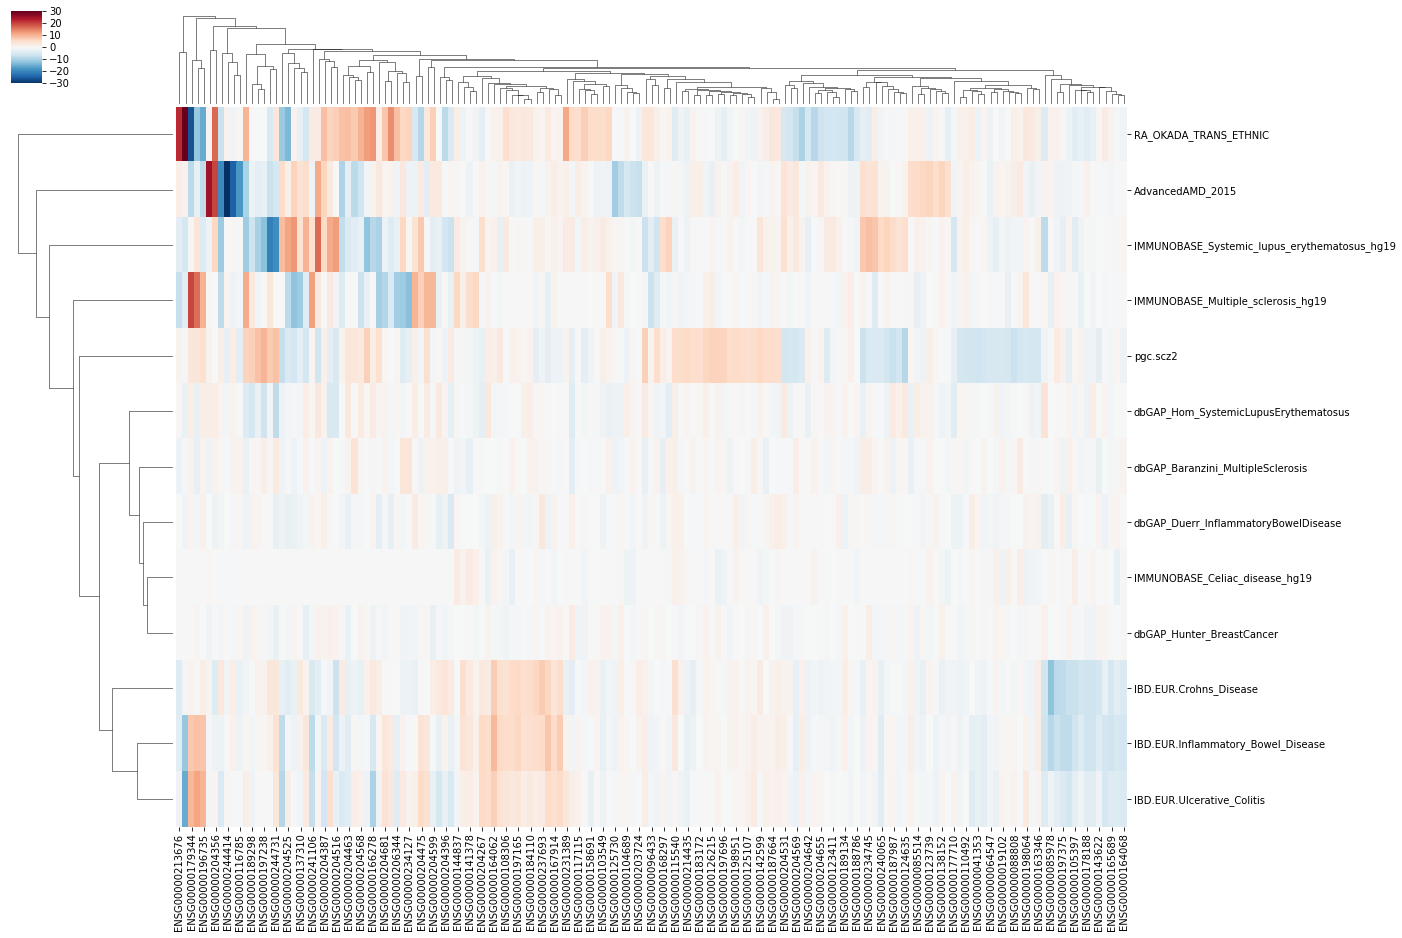

In [39]:
sns.clustermap(pd.DataFrame(mat0, index = id2phenotype, columns = [id2gene[j] for j in np.where(ind)[0]]), 
               cmap = 'RdBu_r', 
               vmax = 30, vmin = -30, figsize = (20, 15))
plt.show()

In [40]:
ind_mat0 = ind_mat[:, ind]

In [41]:
ind_mat0.shape, mat0.shape

((13, 157), (13, 157))

In [43]:
ind_mat0.sum(), ind_mat0.size

(1888.0, 2041)

In [44]:
import matrix_completion as mc

In [45]:
res, obj_vals = mc.matrix_imputing_ADMM(ind_mat0, mat0, 1e-6, mat0, 1e-5, 1000, compute_obj = True, fat = False)

In [49]:
res.shape, ind_mat0.shape, mat0.shape

((13, 157), (13, 157), (13, 157))

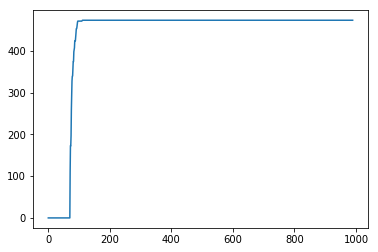

In [46]:
plt.plot(obj_vals[10:])
plt.show()

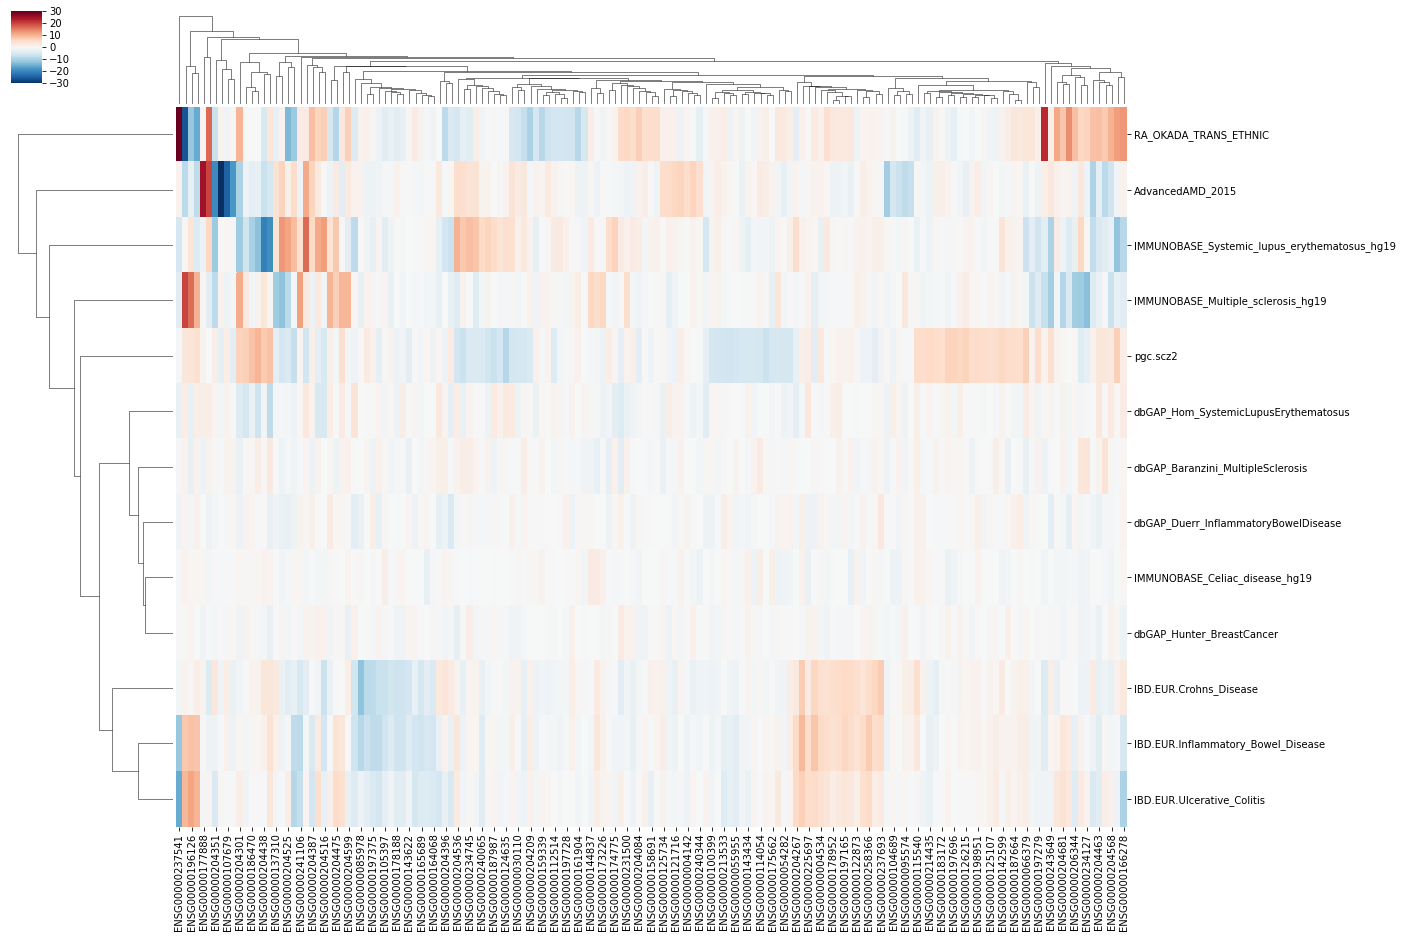

In [50]:
sns.clustermap(pd.DataFrame(res, index = id2phenotype, columns = [id2gene[j] for j in np.where(ind)[0]]), 
               cmap = 'RdBu_r', 
               vmax = 30, vmin = -30, figsize = (20, 15))
plt.show()

In [56]:
ind_test0 = np.random.rand(*ind_mat0.shape)

In [57]:
ind_test = (ind_test0 <= 0.5) * ind_mat0
ind_train = (ind_test0 >= 0.5) * ind_mat0

In [58]:
mat_train = mat0 * ind_train
res, obj_vals = mc.matrix_imputing_ADMM(ind_train, mat_train, 1e-6, mat_train, 1e-5, 500, compute_obj = True, fat = True)

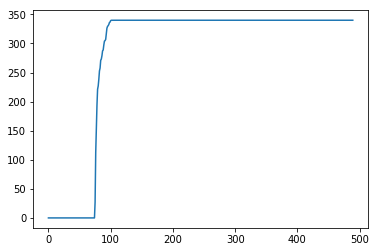

In [59]:
plt.plot(obj_vals[10:])
plt.show()

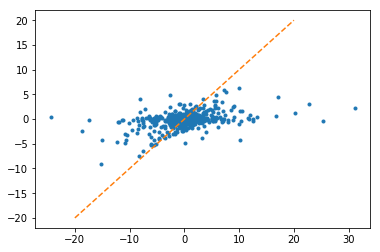

In [60]:
plt.plot(mat0[ind_test > 0.5], res[ind_test > 0.5], '.')
plt.plot([-20, 20], [-20, 20], '--')
plt.show()